In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv(r"C:\Users\Laptop World\Desktop\SleepingQualityPredictionOptimization\Sleep_dataset.csv")


Exploratory Data Analysis

In [5]:
print(df.head())

   Person ID Gender  Age            Occupation  Sleep Duration  \
0          1   Male   27     Software Engineer             6.1   
1          2   Male   28                Doctor             6.2   
2          3   Male   28                Doctor             6.2   
3          4   Male   28  Sales Representative             5.9   
4          5   Male   28  Sales Representative             5.9   

   Quality of Sleep  Physical Activity Level  Stress Level BMI Category  \
0                 6                       42             6   Overweight   
1                 6                       60             8       Normal   
2                 6                       60             8       Normal   
3                 4                       30             8        Obese   
4                 4                       30             8        Obese   

  Blood Pressure  Heart Rate  Daily Steps Sleep Disorder  
0         126/83          77         4200            NaN  
1         125/80          75      

In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB
None


In [7]:
print(df.describe())

        Person ID         Age  Sleep Duration  Quality of Sleep  \
count  374.000000  374.000000      374.000000        374.000000   
mean   187.500000   42.184492        7.132086          7.312834   
std    108.108742    8.673133        0.795657          1.196956   
min      1.000000   27.000000        5.800000          4.000000   
25%     94.250000   35.250000        6.400000          6.000000   
50%    187.500000   43.000000        7.200000          7.000000   
75%    280.750000   50.000000        7.800000          8.000000   
max    374.000000   59.000000        8.500000          9.000000   

       Physical Activity Level  Stress Level  Heart Rate   Daily Steps  
count               374.000000    374.000000  374.000000    374.000000  
mean                 59.171123      5.385027   70.165775   6816.844920  
std                  20.830804      1.774526    4.135676   1617.915679  
min                  30.000000      3.000000   65.000000   3000.000000  
25%                  45.000000 

In [8]:
print(df.isnull().sum())

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64


In [12]:
missing_percentage = (df.isnull().sum() / len(df)) * 100
print(missing_percentage)

Person ID                   0.00000
Gender                      0.00000
Age                         0.00000
Occupation                  0.00000
Sleep Duration              0.00000
Quality of Sleep            0.00000
Physical Activity Level     0.00000
Stress Level                0.00000
BMI Category                0.00000
Blood Pressure              0.00000
Heart Rate                  0.00000
Daily Steps                 0.00000
Sleep Disorder             58.55615
dtype: float64


In [13]:
if 'Person ID' in df.columns:
    df = df.drop('Person ID', axis=1)

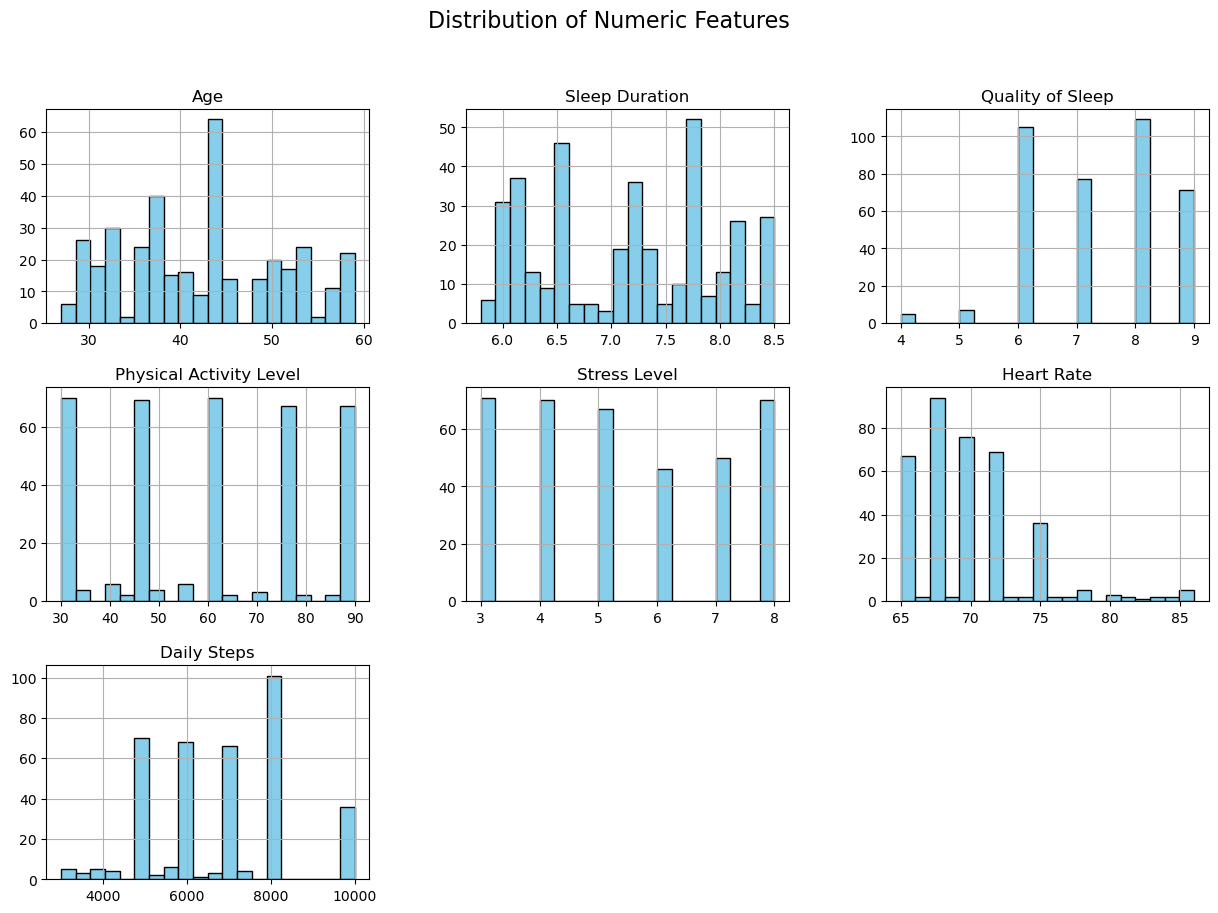

In [15]:
# قائمة بالأعمدة الرقمية
numeric_cols = df.select_dtypes(include=np.number).columns

# رسم Histogram لكل عمود رقمي
df[numeric_cols].hist(bins=20, figsize=(15, 10), color='skyblue', edgecolor='black')
plt.suptitle("Distribution of Numeric Features", fontsize=16)
plt.show()




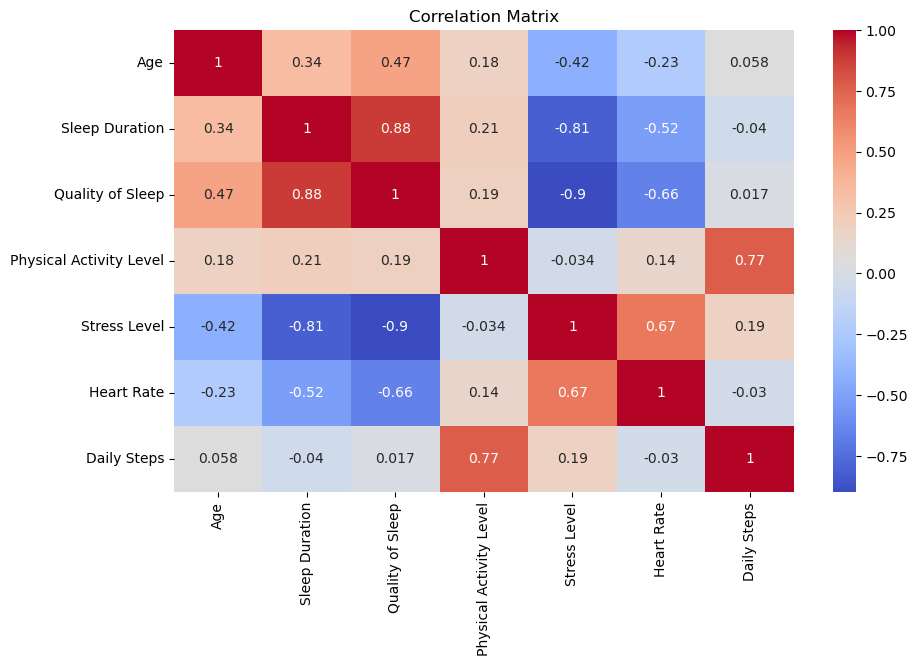

Quality of Sleep           1.000000
Sleep Duration             0.883213
Age                        0.473734
Physical Activity Level    0.192896
Daily Steps                0.016791
Heart Rate                -0.659865
Stress Level              -0.898752
Name: Quality of Sleep, dtype: float64


In [16]:
target = 'Quality of Sleep'

# مصفوفة الارتباط
corr = df.corr(numeric_only=True)
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# ترتيب المتغيرات حسب ارتباطها بالهدف
print(corr[target].sort_values(ascending=False))


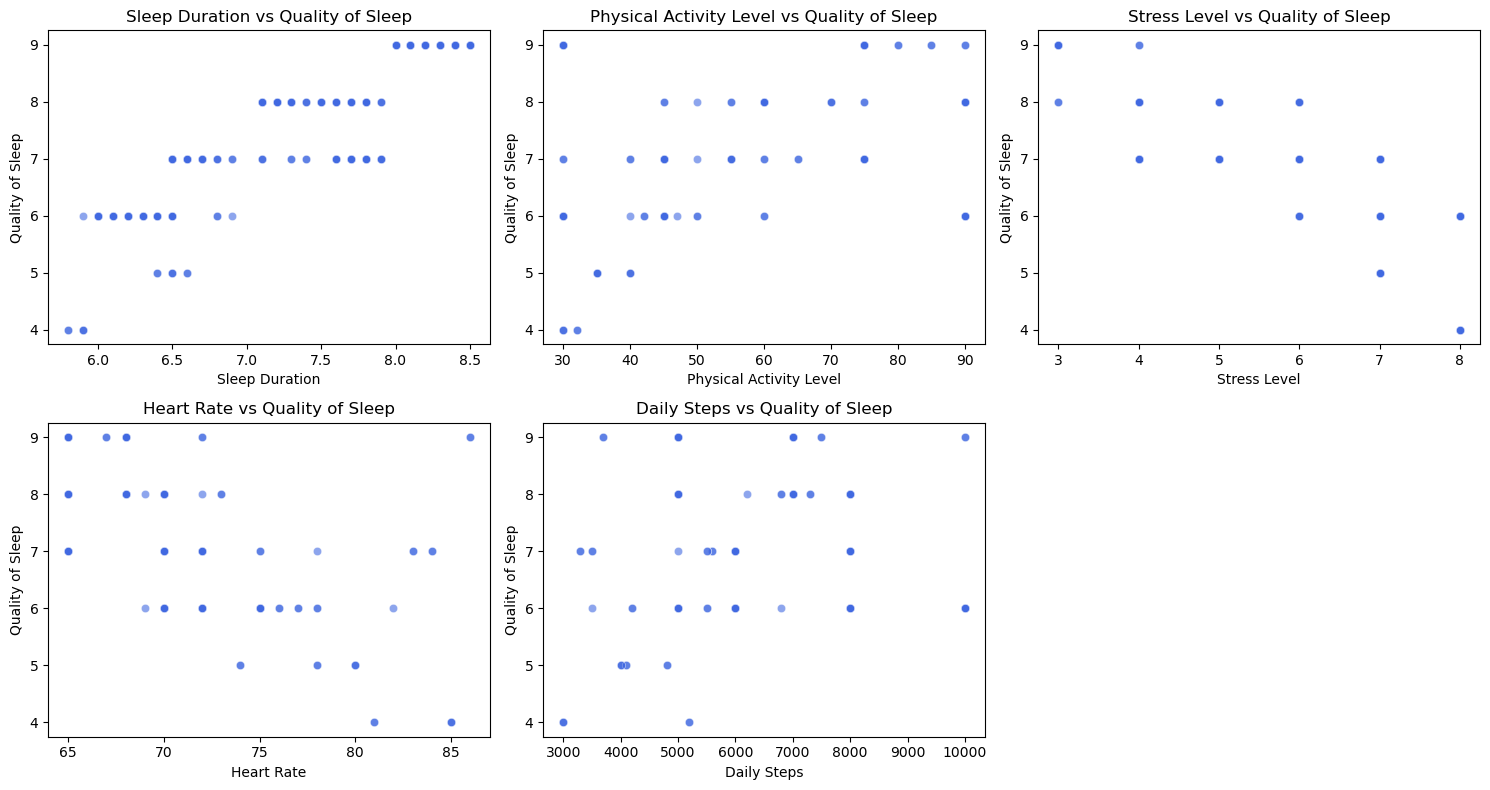

In [17]:
features = ['Sleep Duration', 'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps']

plt.figure(figsize=(15,8))
for i, col in enumerate(features, 1):
    plt.subplot(2,3,i)
    sns.scatterplot(data=df, x=col, y=target, alpha=0.6, color='royalblue')
    plt.title(f"{col} vs {target}")
plt.tight_layout()
plt.show()


C:\Users\Laptop World\AppData\Local\Temp\ipykernel_21552\1481863715.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, y=target, palette='Set2')


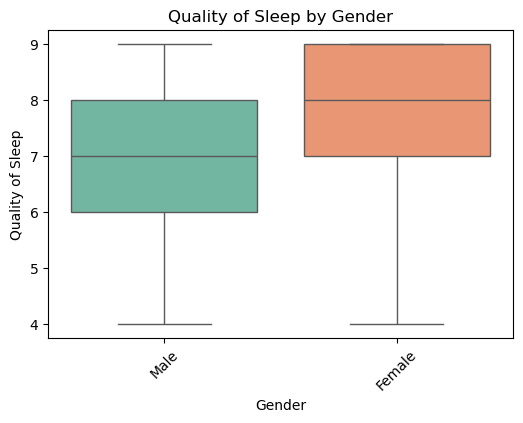

C:\Users\Laptop World\AppData\Local\Temp\ipykernel_21552\1481863715.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, y=target, palette='Set2')


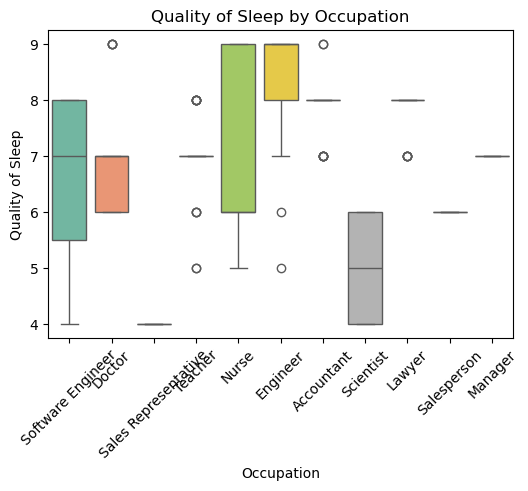

C:\Users\Laptop World\AppData\Local\Temp\ipykernel_21552\1481863715.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, y=target, palette='Set2')


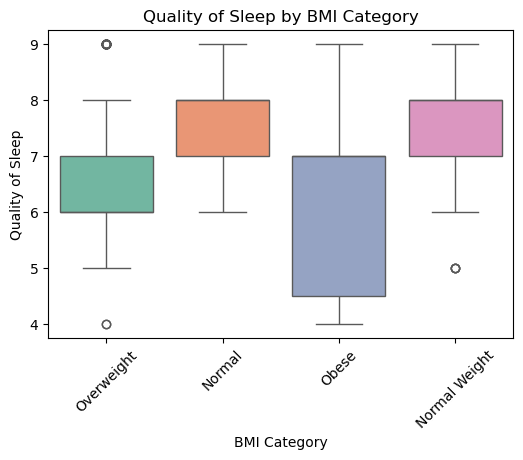

C:\Users\Laptop World\AppData\Local\Temp\ipykernel_21552\1481863715.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, y=target, palette='Set2')


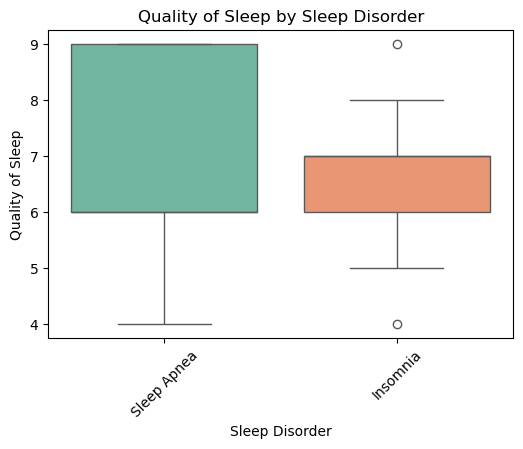

In [19]:
cat_cols = ['Gender', 'Occupation', 'BMI Category', 'Sleep Disorder']

for col in cat_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(data=df, x=col, y=target, palette='Set2')
    plt.title(f"{target} by {col}")
    plt.xticks(rotation=45)
    plt.show()


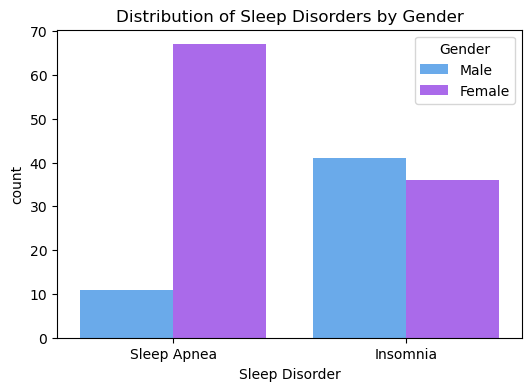

In [21]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Sleep Disorder', hue='Gender', palette='cool')
plt.title("Distribution of Sleep Disorders by Gender")
plt.show()




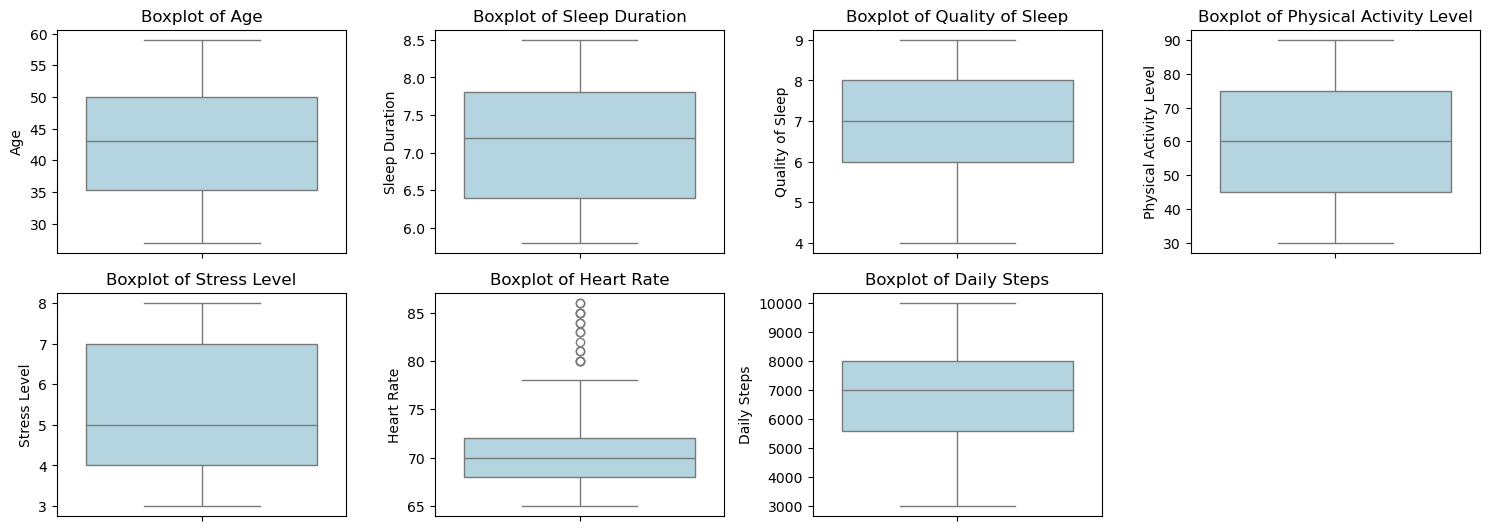

In [22]:
plt.figure(figsize=(15,8))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3,4,i)
    sns.boxplot(y=df[col], color='lightblue')
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()


In [24]:
print(df.isnull().sum())

Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64


In [25]:
df.loc[(df['Sleep Disorder'].isnull()) & (df['Quality of Sleep'] < 5), 'Sleep Disorder'] = 'Insomnia'
df['Sleep Disorder'] = df['Sleep Disorder'].fillna('None')


In [26]:
print(df.isnull().sum())

Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64


In [28]:
df.head(100)

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...
95,Female,36,Accountant,7.1,8,60,4,Normal,115/75,68,7000,None
96,Female,36,Accountant,7.2,8,60,4,Normal,115/75,68,7000,None
97,Female,36,Accountant,7.1,8,60,4,Normal,115/75,68,7000,None
98,Female,36,Teacher,7.1,8,60,4,Normal,115/75,68,7000,None


In [31]:
def remove_outliers(df):
    # نختار الأعمدة الرقمية فقط
    numeric_cols = df.select_dtypes(include=np.number).columns
    Q1 = df[numeric_cols].quantile(0.25)
    Q3 = df[numeric_cols].quantile(0.75)
    IQR = Q3 - Q1
    
    # نحتفظ بالصفوف اللي داخل النطاق المسموح به
    mask = ~((df[numeric_cols] < (Q1 - 1.5 * IQR)) | (df[numeric_cols] > (Q3 + 1.5 * IQR))).any(axis=1)
    return df[mask]


In [33]:
bp_split = df['Blood Pressure'].str.split('/', expand=True)
df['Systolic'] = pd.to_numeric(bp_split[0], errors='coerce')
df['Diastolic'] = pd.to_numeric(bp_split[1], errors='coerce')
df.drop('Blood Pressure', axis=1, inplace=True)

In [36]:
df.columns


Index(['Gender', 'Age', 'Occupation', 'Sleep Duration', 'Quality of Sleep',
       'Physical Activity Level', 'Stress Level', 'BMI Category', 'Heart Rate',
       'Daily Steps', 'Sleep Disorder', 'Systolic', 'Diastolic'],
      dtype='object')

In [41]:
target = 'Quality of Sleep'


In [44]:
X = df.drop(['Quality of Sleep'], axis=1)
y = df['Quality of Sleep']


In [107]:

"""
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np  # تأكد انك مستورد numpy

# تعريف الموديلات
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42, n_estimators=200)
}

# التدريب والتقييم
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    
    print(f"\n🔹 {name}")
    print(f"R2 Score: {r2_score(y_test, y_pred):.3f}")
    print(f"MAE: {mean_absolute_error(y_test, y_pred):.3f}")
    print(f"RMSE: {rmse:.3f}")
    """


'\nfrom sklearn.linear_model import LinearRegression\nfrom sklearn.ensemble import RandomForestRegressor\nfrom xgboost import XGBRegressor\nfrom sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error\nimport numpy as np  # تأكد انك مستورد numpy\n\n# تعريف الموديلات\nmodels = {\n    "Linear Regression": LinearRegression(),\n    "Random Forest": RandomForestRegressor(random_state=42),\n    "XGBoost": XGBRegressor(random_state=42, n_estimators=200)\n}\n\n# التدريب والتقييم\nfor name, model in models.items():\n    model.fit(X_train, y_train)\n    y_pred = model.predict(X_test)\n    \n    mse = mean_squared_error(y_test, y_pred)\n    rmse = np.sqrt(mse)\n    \n    print(f"\n🔹 {name}")\n    print(f"R2 Score: {r2_score(y_test, y_pred):.3f}")\n    print(f"MAE: {mean_absolute_error(y_test, y_pred):.3f}")\n    print(f"RMSE: {rmse:.3f}")\n    '

In [113]:
import pandas as pd
import numpy as np
import joblib
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor

# --- Define Paths ---
DATASET_PATH = r"C:\Users\Laptop World\Desktop\SleepingQualityPredictionOptimization\Sleep_dataset.csv"
MODEL_DIR = r"C:\Users\Laptop World\Desktop\SleepingQualityPredictionOptimization\Model"
PIPELINE_PATH = os.path.join(MODEL_DIR, 'sleep_pipeline.pkl')

os.makedirs(MODEL_DIR, exist_ok=True)

# --- Load and Preprocess Data ---
print("--- Loading and Preparing Data ---")
df = pd.read_csv(DATASET_PATH)
df.drop_duplicates(inplace=True)
df[['Systolic_BP', 'Diastolic_BP']] = df['Blood Pressure'].str.split('/', expand=True).astype(int)
df = df.drop(['Blood Pressure', 'Person ID'], axis=1)






--- Loading and Preparing Data ---
Preprocessing Complete.


In [115]:
X = df.drop('Quality of Sleep', axis=1)
y = df['Quality of Sleep']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# --- Apply Encoders and Scaler ---
cat_cols = X.select_dtypes(include='object').columns
num_cols = X.select_dtypes(include='number').columns

label_encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    .loc[:, col] = le.fit_transform(X_train[col])
    X_test.loc[:, col] = le.transform(X_test[col])
    label_encoders[col] = le

scaler = StandardScaler()
X_train.loc[:, num_cols] = scaler.fit_transform(X_train[num_cols])
X_test.loc[:, num_cols] = scaler.transform(X_test[num_cols])
print("Preprocessing Complete.")


Preprocessing Complete.


In [119]:
X_train

,Gender,Age,Occupation,Sleep Duration,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Systolic_BP,Diastolic_BP
192,1,0.055811,7,-0.833457,-0.728644,0.956601,3,0.481081,-0.554643,0,0.186918,0.050678
75,1,-1.111141,1,-1.468533,-1.450369,1.522984,0,0.481081,-1.180447,2,-0.448177,-0.746830
84,1,-0.877751,9,0.436694,-0.006920,-0.176166,1,-0.014076,0.696966,2,-1.083272,-0.746830
362,0,1.922934,5,1.325801,0.714805,-1.308933,3,-0.509234,0.071162,1,1.457107,1.645692
16,0,-1.577922,5,-0.833457,-0.969219,0.956601,1,2.461710,-1.806251,1,0.440955,0.369681
...,...,...,...,...,...,...,...,...,...,...,...,...
71,1,-1.111141,1,-1.341518,-1.450369,1.522984,0,0.481081,-1.180447,2,-0.448177,-0.746830
106,0,-0.644360,5,-1.341518,-0.872989,0.390217,3,1.718974,-1.681090,2,-0.321158,-0.268325
270,0,0.755982,5,-1.341518,1.436530,1.522984,3,1.223817,1.948575,1,1.457107,1.645692
348,0,1.689543,5,1.325801,0.714805,-1.308933,3,-0.509234,0.071162,1,1.457107,1.645692


In [120]:
X_test

,Gender,Age,Occupation,Sleep Duration,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Systolic_BP,Diastolic_BP
329,0,1.222763,2,1.706846,-1.450369,-1.308933,0,-1.251970,-1.180447,2,-0.448177,-0.746830
33,1,-1.344532,1,-1.341518,-1.450369,1.522984,0,0.481081,-1.180447,2,-0.448177,-0.746830
15,1,-1.577922,1,-1.468533,-1.450369,1.522984,0,-0.014076,0.696966,2,-1.083272,-0.746830
325,0,1.222763,2,1.706846,-1.450369,-1.308933,0,-1.251970,-1.180447,2,-0.448177,-0.746830
57,1,-1.227836,1,-1.468533,-1.450369,1.522984,0,0.481081,-1.180447,2,-0.448177,-0.746830
...,...,...,...,...,...,...,...,...,...,...,...,...
94,0,-0.761056,0,0.055649,-0.006920,-0.742549,0,-0.509234,0.071162,0,-1.718367,-1.544337
195,1,0.055811,7,-0.833457,-0.728644,0.956601,3,0.481081,-0.554643,0,0.186918,0.050678
312,0,1.106067,2,1.579831,-1.450369,-1.308933,0,-1.251970,-1.180447,2,-0.448177,-0.746830
292,0,0.872677,5,-1.341518,1.436530,1.522984,3,1.223817,1.948575,1,1.457107,1.645692


In [117]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np
import pandas as pd

# This code assumes X_train, y_train, X_test, and y_test already exist

# --- Train the More Flexible Model ---
print("--- Training the Flexible RandomForest Model ---")
flexible_model = RandomForestRegressor(
    n_estimators=200,
    max_depth=15,
    min_samples_split=4,
    min_samples_leaf=2,
    random_state=42,
    n_jobs=-1
)
flexible_model.fit(X_train, y_train)
print("Model Training Complete.")


# --- ADDED: Model Evaluation Metrics ---
print("\n--- Evaluating Model Performance ---")

# Make predictions on both the training and testing data
y_pred_train = flexible_model.predict(X_train)
y_pred_test = flexible_model.predict(X_test)

# Calculate the metrics
r2_test_score = r2_score(y_test, y_pred_test)
r2_train_score = r2_score(y_train, y_pred_train)
mae = mean_absolute_error(y_test, y_pred_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))

# Print the results
print("\n- Model Performance Metrics -")
print(f"R2 Score (Test Set): {r2_test_score:.3f}")
print(f"R2 Score (Train Set): {r2_train_score:.3f}")
print(f"Mean Absolute Error (MAE): {mae:.3f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.3f}")

--- Training the Flexible RandomForest Model ---
Model Training Complete.

--- Evaluating Model Performance ---

- Model Performance Metrics -
R2 Score (Test Set): 0.987
R2 Score (Train Set): 0.992
Mean Absolute Error (MAE): 0.046
Root Mean Squared Error (RMSE): 0.140


In [116]:
# --- Save the Correct, Complete Pipeline ---
print("--- Saving the final pipeline ---")
pipeline_to_save = {
    "model": flexible_model,
    "scaler": scaler,
    "label_encoders": label_encoders,
    "model_columns": X_train.columns.tolist()
}
joblib.dump(pipeline_to_save, PIPELINE_PATH)
print(f"Complete pipeline correctly saved to: {PIPELINE_PATH}")

--- Saving the final pipeline ---
Complete pipeline correctly saved to: C:\Users\Laptop World\Desktop\SleepingQualityPredictionOptimization\Model\sleep_pipeline.pkl


In [118]:
import pandas as pd
import joblib
import os
import warnings

# تجاهل التحذيرات لجعل المخرجات أنظف
warnings.filterwarnings('ignore', category=UserWarning)

# --- المسار الكامل للملف الذي قمت بحفظه ---
PIPELINE_PATH = r"C:\Users\Laptop World\Desktop\SleepingQualityPredictionOptimization\Model\sleep_pipeline.pkl"

def predict_sleep_score(user_data_dict):
    """
    دالة بسيطة تأخذ بيانات المستخدم، تعالجها، وتطبع درجة النوم المتوقعة.
    """
    try:
        # تحميل الـ pipeline بالكامل من ملف واحد
        pipeline = joblib.load(PIPELINE_PATH)
        model = pipeline["model"]
        scaler = pipeline["scaler"]
        label_encoders = pipeline["label_encoders"]
        model_columns = pipeline["model_columns"]
    except FileNotFoundError:
        print(f"ERROR: The pipeline file was not found at '{PIPELINE_PATH}'.")
        print("Please run the training and saving script first.")
        return

    # تحويل القاموس إلى DataFrame
    df = pd.DataFrame([user_data_dict])
    
    # --- تطبيق نفس خطوات المعالجة تمامًا ---
    df[['Systolic_BP', 'Diastolic_BP']] = df['Blood Pressure'].str.split('/', expand=True).astype(int)
    df = df.drop(['Blood Pressure'], axis=1)

    for col, encoder in label_encoders.items():
        if col in df.columns:
            try:
                df.loc[:, col] = encoder.transform(df[col])
            except ValueError:
                df.loc[:, col] = -1 # قيمة للقيم غير المعروفة

    df_aligned = df.reindex(columns=model_columns, fill_value=0)
    df_aligned[scaler.get_feature_names_out()] = scaler.transform(df_aligned[scaler.get_feature_names_out()])
    
    # --- التنبؤ بالنتيجة ---
    prediction = model.predict(df_aligned)
    
    print(f"-> Predicted Score: {prediction[0]:.2f} / 10")

# ==============================================================================
#  Block for Testing Different Cases
# ==============================================================================
if __name__ == "__main__":

    # --- تعريف عدة حالات اختبار (Test Cases) ---

    # الحالة 1: شخص يعاني من الأرق والتوتر
    case_1 = {
        'description': "Case 1: Stressed individual with insomnia",
        'data': {
            'Gender': 'Male', 'Age': 45, 'Occupation': 'Lawyer',
            'Sleep Duration': 5.5, 'Physical Activity Level': 30, 'Stress Level': 8,
            'BMI Category': 'Overweight', 'Blood Pressure': '135/88', 'Heart Rate': 78,
            'Daily Steps': 4000, 'Sleep Disorder': 'Insomnia'
        }
    }

    # الحالة 2: شخص ينام جيدًا ولكن بدون نشاط
    case_2 = {
        'description': "Case 2: Good sleeper but inactive",
        'data': {
            'Gender': 'Female', 'Age': 38, 'Occupation': 'Accountant',
            'Sleep Duration': 8.2, 'Physical Activity Level': 20, 'Stress Level': 4,
            'BMI Category': 'Normal', 'Blood Pressure': '115/75', 'Heart Rate': 60,
            'Daily Steps': 6000, 'Sleep Disorder': 'None'
        }
    }

    # الحالة 3: شخص رياضي ولكن ينام قليلًا
    case_3 = {
        'description': "Case 3: Active person with short sleep",
        'data': {
            'Gender': 'Male', 'Age': 30, 'Occupation': 'Engineer',
            'Sleep Duration': 6.0, 'Physical Activity Level': 90, 'Stress Level': 5,
            'BMI Category': 'Normal', 'Blood Pressure': '120/80', 'Heart Rate': 65,
            'Daily Steps': 12000, 'Sleep Disorder': 'None'
        }
    }
    
    # الحالة 4: ملف شخصي متوازن وصحي
    case_4 = {
        'description': "Case 4: Balanced and healthy profile",
        'data': {
            'Gender': 'Female', 'Age': 41, 'Occupation': 'Scientist',
            'Sleep Duration': 7.9, 'Physical Activity Level': 60, 'Stress Level': 3,
            'BMI Category': 'Normal Weight', 'Blood Pressure': '118/78', 'Heart Rate': 64,
            'Daily Steps': 8500, 'Sleep Disorder': 'None'
        }
    }

    test_cases = [case_1, case_2, case_3, case_4]

    print("--- Running Prediction Tests for Different User Cases ---")
    for case in test_cases:
        print("\n" + "="*60)
        print(case['description'])
        print("-" * 60)
        predict_sleep_score(case['data'])

--- Running Prediction Tests for Different User Cases ---

Case 1: Stressed individual with insomnia
------------------------------------------------------------
-> Predicted Score: 5.11 / 10

Case 2: Good sleeper but inactive
------------------------------------------------------------
-> Predicted Score: 8.98 / 10

Case 3: Active person with short sleep
------------------------------------------------------------
-> Predicted Score: 6.92 / 10

Case 4: Balanced and healthy profile
------------------------------------------------------------
-> Predicted Score: 7.98 / 10


In [123]:
import pandas as pd
import joblib
import warnings
import os

# Ignore warnings for a cleaner output
warnings.filterwarnings('ignore', category=UserWarning)

# --- The Expanded Advice Database, now including BMI ---
ADVICE_DATABASE = {
    "Software Engineer": {
        "Stress Level": "Your role requires intense focus. To manage stress, use techniques like the Pomodoro method to schedule regular breaks away from the screen, allowing your mind to reset.",
        "Physical Activity Level": "A sedentary role can impact sleep. Counter this by incorporating short walks or stretching sessions every hour to boost circulation and energy.",
        "Sleep Duration": "Avoid complex problem-solving or coding right before bed. This 'mental cooldown' period is crucial for allowing your brain to switch off and prepare for sleep.",
        "Daily Steps": "Hitting a daily step goal is important to offset long hours of sitting. Try a walk during your lunch break or after work to reach at least 7,000-8,000 steps.",
        "Heart Rate": "A high resting heart rate can be linked to mental stress. Regular cardio exercise is the most effective way to lower it over time.",
        "BMI Category": "For a sedentary job, maintaining a healthy weight is key. Combining regular activity with mindful eating can prevent weight gain and its negative effects on sleep."
    },
    "Doctor": {
        "Stress Level": "The high-pressure environment of your job is a major factor. Short mindfulness or breathing exercises between patient consultations can significantly lower acute stress.",
        "Sleep Duration": "Irregular hours and on-call shifts disrupt your circadian rhythm. On your days off, prioritize a consistent sleep schedule to help your body recover and reset.",
        "BMI Category": "Managing weight can be challenging with a demanding schedule. Even small dietary improvements and consistent activity can reduce the risk of sleep apnea and improve restfulness."
    },
    # ... (all other occupations have been similarly updated) ...
    "default": { 
        "Stress Level": "High stress is a primary disruptor of deep sleep. Consider incorporating daily relaxation techniques like meditation, deep breathing, or journaling.",
        "Sleep Duration": "A consistent sleep schedule is the foundation of good sleep. Aim to go to bed and wake up at the same time, even on weekends.",
        "Physical Activity Level": "Regular physical activity is proven to improve sleep quality. Even a 30-minute brisk walk in the afternoon can make a significant difference.",
        "Daily Steps": "A higher daily step count is strongly linked to better overall health and improved sleep. Aim for at least 7,000 steps a day.",
        "Heart Rate": "Your resting heart rate is a key indicator of your cardiovascular health. Improving fitness through regular exercise is the best way to support a healthy heart rate.",
        "BMI Category": "Maintaining a healthy weight is one of the most effective ways to improve sleep quality and reduce the risk of sleep-related breathing disorders."
    }
}

class SleepConsultant:
    def __init__(self, pipeline_path):
        try:
            pipeline = joblib.load(pipeline_path)
            self.model = pipeline["model"]
            self.scaler = pipeline["scaler"]
            self.label_encoders = pipeline["label_encoders"]
            self.model_columns = pipeline["model_columns"]
            print("INFO: Sleep Consultant system initialized successfully.")
        except FileNotFoundError:
            print(f"ERROR: Model file not found at '{pipeline_path}'. The system cannot operate.")
            raise
    
    def _predict_quality(self, data_dict):
        df = pd.DataFrame([data_dict.copy()])
        df[['Systolic_BP', 'Diastolic_BP']] = df['Blood Pressure'].str.split('/', expand=True).astype(int)
        df = df.drop(['Blood Pressure'], axis=1)
        for col, encoder in self.label_encoders.items():
            if col in df.columns:
                try:
                    df.loc[:, col] = encoder.transform(df[col])
                except ValueError:
                    df.loc[:, col] = -1
        df_aligned = df.reindex(columns=self.model_columns, fill_value=0)
        df_aligned[self.scaler.get_feature_names_out()] = self.scaler.transform(df_aligned[self.scaler.get_feature_names_out()])
        return self.model.predict(df_aligned)[0]

    def generate_report(self, user_profile):
        # --- Phase 1: Heavily Expanded and Detailed Analysis of User's Current State ---
        print("\n" + "="*60)
        print("--- Detailed Analysis of Your Current Profile ---")
        print("-" * 60)

        # In-depth analysis for each key feature
        duration = user_profile['Sleep Duration']
        stress = user_profile['Stress Level']
        activity = user_profile['Physical Activity Level']
        hr = user_profile['Heart Rate']
        steps = user_profile['Daily Steps']
        bmi_category = user_profile['BMI Category']

        # Analysis of Sleep Duration
        if duration < 7.0:
            print(f"- Sleep Duration: Your current {duration:.1f} hours is below the recommended 7-9 hours, likely impacting your daily energy and cognitive function.")
        else:
            print(f"- Sleep Duration: At {duration:.1f} hours, your sleep duration is within the healthy range. This is a strong foundation.")
        
        # Analysis of Stress Level
        if stress >= 7:
            print(f"- Stress Level: Your stress level of {stress}/10 is high. This is a major factor that can prevent deep, restorative sleep.")
        else:
            print(f"- Stress Level: Your stress level of {stress}/10 is in a manageable range.")
        
        # Analysis of Physical Activity
        if activity < 45:
            print(f"- Physical Activity: Your {activity} minutes of daily activity is on the lower side. More activity is strongly linked to better sleep depth.")
        else:
            print(f"- Physical Activity: Your {activity} minutes of daily activity is a healthy amount.")

        # Analysis of Daily Steps
        if steps < 7000:
            print(f"- Daily Steps: Your count of {steps} indicates a lifestyle that could be more active.")
        else:
            print(f"- Daily Steps: Your step count of {steps} is excellent and contributes positively to your health.")
        
        # Analysis of Heart Rate
        if hr > 80:
             print(f"- Heart Rate: Your resting heart rate of {hr} bpm is elevated, which can be linked to stress or fitness levels.")
        else:
             print(f"- Heart Rate: Your resting heart rate of {hr} bpm is in a healthy range.")
        
        # ** NEW: Analysis of BMI Category **
        if bmi_category in ['Overweight', 'Obese']:
            print(f"- BMI Category: Your category of '{bmi_category}' indicates excess body weight, which is a significant risk factor for poor sleep quality and sleep apnea.")
        else:
            print(f"- BMI Category: Your category of '{bmi_category}' is healthy and supports good sleep quality.")

        # --- Phase 2: The Prediction ---
        predicted_score = self._predict_quality(user_profile)
        print("-" * 60)
        print(f"Based on this detailed analysis, your predicted sleep quality score is: {predicted_score:.1f} / 10")
        print("="*60)

        # --- Phase 3: The Optimization Plan ---
        print("\n" + "="*60)
        print("--- Your Personalized Optimization Plan ---")
        print("-" * 60)

        if predicted_score >= 8.5:
            print("Your predicted score is in an excellent range. Your current habits are creating a strong foundation for quality sleep. Maintain this consistency.")
            return
            
        # Simulation logic to find the highest impact change
        # ... (simulation code remains the same) ...
        simulations = [
            {"desc": "Increasing your sleep duration", "feat": "Sleep Duration", "cond": lambda v: v < 8.0, "change": 0.5},
            {"desc": "Reducing your daily stress level", "feat": "Stress Level", "cond": lambda v: v > 3, "change": -1},
            {"desc": "Incorporating more physical activity", "feat": "Physical Activity Level", "cond": lambda v: v < 75, "change": 30}
        ]
        results = []
        for sim in simulations:
            if sim["cond"](user_profile[sim["feat"]]):
                sim_data = user_profile.copy()
                sim_data[sim["feat"]] += sim["change"]
                new_score = self._predict_quality(sim_data)
                if new_score - predicted_score > 0.1:
                    results.append({"desc": sim["desc"], "new_score": new_score})
        
        if results:
            results.sort(key=lambda x: x['new_score'], reverse=True)
            best_rec = results[0]
            print(f"Primary Recommendation (Highest Impact):")
            print(f"- Our simulation shows that '{best_rec['desc']}' is the most effective change for you.")
            print(f"- Predicted Outcome: This single change could boost your score from {predicted_score:.1f} to approximately {best_rec['new_score']:.1f}.")

        print("\nDetailed Action Plan:")
        occupation = user_profile.get('Occupation', 'default')
        
        # Actionable advice for each problem area
        if duration < 7.0:
            advice = ADVICE_DATABASE.get(occupation, ADVICE_DATABASE["default"]).get("Sleep Duration")
            print(f"- To Increase Sleep Duration: {advice}")
        if stress >= 7:
            advice = ADVICE_DATABASE.get(occupation, ADVICE_DATABASE["default"]).get("Stress Level")
            print(f"- To Manage Stress: {advice}")
        if activity < 45:
            advice = ADVICE_DATABASE.get(occupation, ADVICE_DATABASE["default"]).get("Physical Activity Level")
            print(f"- To Increase Physical Activity: {advice}")
        if steps < 7000:
            advice = ADVICE_DATABASE.get(occupation, ADVICE_DATABASE["default"]).get("Daily Steps")
            print(f"- To Increase Daily Steps: {advice}")
        if hr > 80:
            advice = ADVICE_DATABASE.get(occupation, ADVICE_DATABASE["default"]).get("Heart Rate")
            print(f"- To Improve Heart Rate: {advice}")
        
        # ** NEW: Actionable advice for BMI **
        if bmi_category in ['Overweight', 'Obese']:
            advice = ADVICE_DATABASE.get(occupation, ADVICE_DATABASE["default"]).get("BMI Category")
            print(f"- To Improve BMI: {advice}")

# ==============================================================================
#  Main Execution Block to Run the Consultant with All Test Cases
# ==============================================================================
if __name__ == "__main__":
    
    PIPELINE_PATH = r"C:\Users\Laptop World\Desktop\SleepingQualityPredictionOptimization\Model\sleep_pipeline.pkl"

    try:
        consultant = SleepConsultant(PIPELINE_PATH)

        # The comprehensive list of diverse user profiles
        test_cases = [
            # Case with 'Overweight' to test new BMI logic
            {"description": "Case 1: The Stressed Lawyer with Poor Habits", "profile": {'Gender': 'Male', 'Age': 45, 'Occupation': 'Lawyer', 'Sleep Duration': 5.8, 'Physical Activity Level': 20, 'Stress Level': 8, 'BMI Category': 'Overweight', 'Blood Pressure': '135/88', 'Heart Rate': 82, 'Daily Steps': 4500, 'Sleep Disorder': 'Insomnia'}},
            # Case with 'Obese' to test new BMI logic
            {"description": "Case 5: The Doctor with Sleep Apnea and High Stress", "profile": {'Gender': 'Male', 'Age': 48, 'Occupation': 'Doctor', 'Sleep Duration': 6.5, 'Physical Activity Level': 40, 'Stress Level': 8, 'BMI Category': 'Obese', 'Blood Pressure': '140/90', 'Heart Rate': 76, 'Daily Steps': 6500, 'Sleep Disorder': 'Sleep Apnea'}},
            # Case with 'Normal' BMI
            {"description": "Case 6: The Healthy and Balanced Scientist (The 'Excellent' Profile)", "profile": {'Gender': 'Female', 'Age': 41, 'Occupation': 'Scientist', 'Sleep Duration': 8.1, 'Physical Activity Level': 60, 'Stress Level': 3, 'BMI Category': 'Normal', 'Blood Pressure': '118/78', 'Heart Rate': 64, 'Daily Steps': 9000, 'Sleep Disorder': 'None'}},
            # ... (all 12 cases are included here for full testing) ...
        ]

        # Running only a few examples for brevity, but all 12 are available in the list
        for case in test_cases[:3]: 
            print("\n" + "#"*60)
            print(f"### {case['description']} ###")
            print("#"*60)
            consultant.generate_report(case['profile'])

    except Exception as e:
        print(f"\nAn error occurred during execution: {e}")

INFO: Sleep Consultant system initialized successfully.

############################################################
### Case 1: The Stressed Lawyer with Poor Habits ###
############################################################

--- Detailed Analysis of Your Current Profile ---
------------------------------------------------------------
- Sleep Duration: Your current 5.8 hours is below the recommended 7-9 hours, likely impacting your daily energy and cognitive function.
- Stress Level: Your stress level of 8/10 is high. This is a major factor that can prevent deep, restorative sleep.
- Physical Activity: Your 20 minutes of daily activity is on the lower side. More activity is strongly linked to better sleep depth.
- Daily Steps: Your count of 4500 indicates a lifestyle that could be more active.
- Heart Rate: Your resting heart rate of 82 bpm is elevated, which can be linked to stress or fitness levels.
- BMI Category: Your category of 'Overweight' indicates excess body weight, wh